# CH03_4_Generate Neuron for Linear Regression 

- Last update : 2022.03.24. 

## Loss Function 
- It defines the difference between expected value and actual targeted value. 

## Gradient Discent 
- When loss function is defined, the method search for the minimum value of loss function

> ### Differenciation of loss function(Squred Error)
- updating weight and interscept by multiplying change rate to error 


|||| Dataset Preperation >> load_diabetes()=======
>>> diabetes = {'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       25

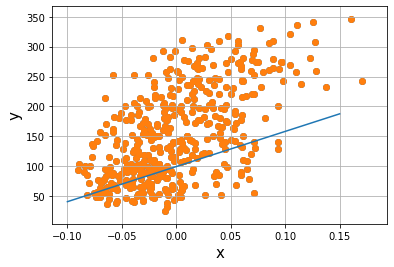

>>> w = 913.5973364345905
>>> b = 123.39414383177204


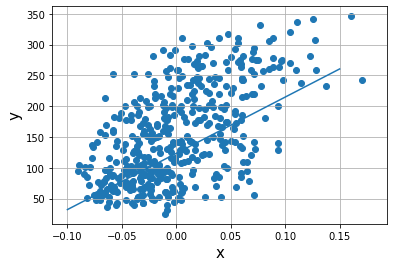

287.8416643899983


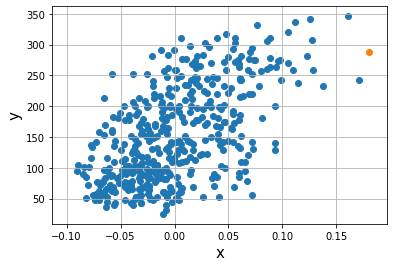

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

print ("==================================================")
print ("|||| Dataset Preperation >> load_diabetes()=======")
print ("==================================================")

diabetes = load_diabetes()
print (">>> diabetes =", diabetes)

plt.scatter(diabetes.data[:, 2], diabetes.target)

# DATA PREPERATION 

x = diabetes.data[:, 2]
y = diabetes.target

# initializing w, b 

w = 1.0
b = 1.0 

# Attaining y_hat using first sample data of training dataset 

y_hat = x[0]*w +b
print(y_hat)

# Comparing Target data with predicted data
print (y[0])

# Change predicted result by controling w value 

w_inc = w + 0.1 
y_hat_inc = x[0] * w_inc + b 

print (y_hat_inc)

# Prediction changes rate check by controling w value 

w_rate = (y_hat_inc-y_hat)/ (w_inc-w)

print (w_rate)

# weight value update by change rate 
w_new = w + w_rate 
print (w_new)

# intercept update by change rate 

b_inc = b + 0.1
y_hat_inc = x[0] * w +b_inc

print (">>> y_hat_inc =", y_hat_inc)

b_rate = (y_hat_inc - y_hat)/ (b_inc-b)
print ("\n>>> b_rate =", b_rate)

# weight and intercept upate by backpropergation 

err = y[0] - y_hat
w_new = w + w_rate * err 
b_new = b + 1 * err 

print (">>> w_new =", w_new)
print (">>> b_new =", b_new)

y_hat = x[1] * w_new + b_new 
err = y[1] - y_hat 
w_rate = x[1]
w_new = w_new + w_rate * err 
b_new = b_new + 1 * err 

print (">>> w_new =", w_new)
print (">>> b_new =", b_new)

# Repeate for all dataset 

for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b 
    err = y_i - y_hat 
    w_rate = x_i
    w = w + w_rate * err 
    b = b + 1 * err 

print (">>> w =", w)
print (">>> b =", b)

# plotting results 

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])

plt.xlabel('x', fontsize =15)
plt.ylabel('y', fontsize =15)

plt.grid()
plt.show()

# REPEAT VARIOUS EPOCH 

for i in range(1, 100): 
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b 
        err = y_i - y_hat 
        w_rate = x_i
        w = w + w_rate * err 
        b = b + 1 * err 

print (">>> w =", w)
print (">>> b =", b)        

# plotting results 

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])

plt.xlabel('x', fontsize =15)
plt.ylabel('y', fontsize =15)

plt.grid()
plt.show()

# Predict using model 

x_new = 0.18
y_pred = x_new * w + b 

print (y_pred)

# plotting results 

plt.scatter(x, y)
plt.scatter(x_new, y_pred) 

plt.xlabel('x', fontsize =15)
plt.ylabel('y', fontsize =15)

plt.grid()
plt.show()

# Generate Neuron for Linear Regression

In [18]:
class Neuron: 
    
    #----------------------------------
    # initializing process proceeding 
    #----------------------------------
    def __init__(self):
        self.w = 1.0                    # initializing weights
        self.b = 1.0                    # initializing interscepts 
        
    #----------------------------------
    # Allocating Requried method 
    # 1. Foward propagationd
    #----------------------------------
    def forpass(self, x):
        y_hat = x * self.w + self.b     # line function Calculation 
        return y_hat 
    
    #----------------------------------
    # 2. Backward propagationd
    #----------------------------------
    def backprop(self, x, err): 
        w_grad = x * err                # Calculating gradient on weight 
        b_grad = 1 * err                # Calculating gradient on interscept  
        return w_grad, b_grad        
    
    #----------------------------------
    # 3. Fit method Generation for trainning 
    #----------------------------------
    def fit(self, x, y, epochs = 100):
        for i in range(epochs):                           # repeate epoch times 
            for x_i, y_i in zip(x, y):                    # repeate for every sample
                y_hat = self.forpass(x_i)                 # forward propagation       
                err = -(y_i - y_hat)                      # error calculation 
                w_grad, b_grad = self.backprop(x_i, err)  # backward propagation 
                self.w -= w_grad                          # updating weight 
                self.b -= b_grad                          # updating intercept

In [19]:
neuron = Neuron()
neuron.fit(x, y)

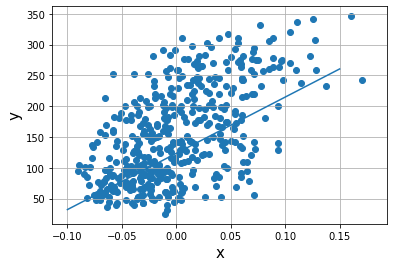

In [20]:
# plotting results 

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])

plt.xlabel('x', fontsize =15)
plt.ylabel('y', fontsize =15)

plt.grid()
plt.show()